In [53]:
import pandas as pd
import ast
import os

STRATEGIES = "['erc20-balance-of', 'erc721']"
#STRATEGIES = os.getenv(STRATEGIES)


class Spaces:
    def __init__(
        self,
        df : pd.DataFrame):

        self.df = df
        # Transform to list of strs
        self.strategies = ast.literal_eval(STRATEGIES)

    def _get_spaces_strategies(self):
        # https://snapshot.org/#/strategies
        fields = []
        # Transform to list of dicts
        self.df.strategies = self.df.strategies.apply(lambda x: ast.literal_eval(x)) 
        names = []
        strats = []
        for y in self.df.strategies:
            _fields = []
            _strats = []
            for x in y:
                name = x.get("name", "")
                if name in self.strategies:    
                    names.append(name)
                    _strats.append(name)
                    params = x.get("params", {})
                    for k, v in params.items():
                        field = {"_".join([name, k]) : v}
                        _fields.append(field)
            _fields = {k: v for d in _fields for k, v in d.items()} # merge dicts
            fields.append(_fields)
            strats.append(_strats)
        
        print("end")
        return fields, names, strats



In [54]:
df = pd.read_csv("../df_spaces_new.csv")

In [55]:
df.head()

,Unnamed: 0,id,name,about,avatar,terms,symbol,skin,github,email,...,plugins_quorum_methodABI_outputs,plugins_quorum_methodABI_stateMutability,plugins_quorum,plugins_safeSnap_name,plugins_safeSnap_filters_minScore,plugins_safeSnap_filters_defaultTab,plugins_safeSnap_plugins_daoModule_address,plugins_safeSnap_strategies,plugins_safeSnap_daoModule_address,plugins_aragon_id
0,0,homdao.eth,HOM DAO,"Providing keys for you to build wealth, buy pr...",ipfs://QmaKxkniLdrnrM64JpfPXXWVS49i4UgX2qzT5df...,NaN,PHOM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,northpolemoney.eth,NorthPole.money,A distant island where you freeze your assets ...,ipfs://QmRBD5Tff7YKAFF2xmdJ42YiGFGmgc8GoUt1o72...,NaN,sNORTH,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,web3-dao.eth,Web3 DAO,Web3 Investment Club,NaN,NaN,WEB3,balancer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tonkavan.eth,Decentralized S3,NaN,ipfs://QmcpZbih6wHbh5Lr1VbB39zo1kvLc679iN1GeUc...,NaN,S3,agdeportes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,sbudao.eth,SBU,NaN,https://pbs.twimg.com/profile_images/146153299...,NaN,SBU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df = Spaces(df)

In [57]:
fields, names, strats = df._get_spaces_strategies()

end


In [58]:
from collections import Counter


<AxesSubplot:>

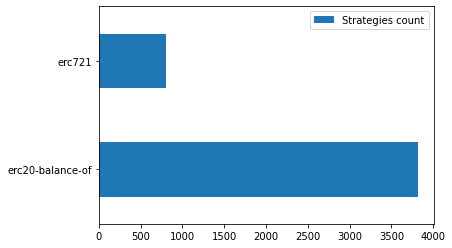

In [59]:
counts = Counter(names)
pd.DataFrame([counts]).T.sort_values(by=0, ascending=False).rename(columns={0:"Strategies count"}).head(20).plot.barh()

In [60]:
pd.DataFrame([counts]).T.sort_values(by=0, ascending=False).rename(columns={0:"Spaces count"}).head(20)

,Spaces count
erc20-balance-of,3813
erc721,809


In [61]:
pd.DataFrame([counts]).T.sort_values(by=0, ascending=False).rename(columns={0:"Spaces count"}).sum()

Spaces count    4622
dtype: int64

In [62]:
len(counts.keys())

2

In [63]:
strats[:10]

[['erc20-balance-of'],
 ['erc20-balance-of'],
 ['erc20-balance-of'],
 [],
 [],
 ['erc20-balance-of'],
 ['erc20-balance-of'],
 ['erc20-balance-of'],
 ['erc20-balance-of'],
 ['erc20-balance-of']]

In [65]:
counts = Counter([", ".join(sorted(x)) for x in strats])

In [66]:
pd.DataFrame([counts]).T

,0
erc20-balance-of,3148
,977
erc721,574
"erc20-balance-of, erc20-balance-of",115
"erc721, erc721",19
"erc20-balance-of, erc20-balance-of, erc20-balance-of",29
"erc20-balance-of, erc721",130
"erc20-balance-of, erc20-balance-of, erc20-balance-of, erc20-balance-of, erc20-balance-of, erc20-balance-of, erc20-balance-of, erc20-balance-of",4
"erc20-balance-of, erc20-balance-of, erc721",10
"erc20-balance-of, erc721, erc721",5


In [42]:
df_fields = pd.DataFrame(fields)

In [70]:
df.df.strategies[15]

[{'name': 'erc20-balance-of',
  'params': {'symbol': 'CDT',
   'address': '0x31989E0c6787c3F6781427BDE1A7b9A03B9a544D',
   'decimals': 18}}]

In [49]:
fields[i]

{'erc20-balance-of_symbol': 'PHOM',
 'erc20-balance-of_address': '0x74586034cf0e7aed7e0c5cc2abe449520a5d82c7',
 'erc20-balance-of_decimals': 18}

In [52]:
fields[:30]

[{'erc20-balance-of_symbol': 'PHOM',
  'erc20-balance-of_address': '0x74586034cf0e7aed7e0c5cc2abe449520a5d82c7',
  'erc20-balance-of_decimals': 18},
 {'erc20-balance-of_symbol': 'sNORTH',
  'erc20-balance-of_address': '0xe40EddA6d49d935D03eC8F7FAFd84DE14d99D2a1',
  'erc20-balance-of_decimals': 18},
 {'erc20-balance-of_symbol': 'WEB3',
  'erc20-balance-of_address': '0x48ffdc9f4533c2de5ad3d448d30b6f706ebdb6a1',
  'erc20-balance-of_decimals': 18},
 {'erc1155-balance-of_symbol': 'S3',
  'erc1155-balance-of_address': '0x2953399124F0cBB46d2CbACD8A89cF0599974963',
  'erc1155-balance-of_tokenId': '43057838738407184153270976115277294017846352437158525761865245453717367422986',
  'erc1155-balance-of_decimals': 0},
 {'erc20-with-balance_symbol': 'SBU',
  'erc20-with-balance_address': '0x4848a07744e46bb3ea93ad4933075a4fa47b1162',
  'erc20-with-balance_decimals': 0},
 {'comp-like-votes_symbol': 'Staked XVS',
  'comp-like-votes_address': '0x051100480289e704d20e9DB4804837068f3f9204',
  'comp-like-vot